In [1]:
#this is data I'm using :https://data.cityofnewyork.us/api/views/26ze-s5bx/rows.csv?accessType=DOWNLOAD
from __future__ import print_function 

In [2]:
!curl https://data.cityofnewyork.us/api/views/26ze-s5bx/rows.csv?accessType=DOWNLOAD > Average_Daily_Inmate_Population.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   140    0   140    0     0    822      0 --:--:-- --:--:-- --:--:--   818


In [3]:
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yq729/PUIdata


In [4]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yq729/PUIdata


In [5]:
# move the data
!mv Average_Daily_Inmate_Population.csv $PUIDATA

In [6]:
#test if the data is there
!ls $PUIDATA

Average_Daily_Inmate_Population.csv


In [8]:
#read in the data with pandas
import pandas as pd
adip = pd.read_csv("%s/Average_Daily_Inmate_Population.csv"%os.getenv("PUIDATA"))

In [9]:
#print the fist 8 lines out
adip.head(8)

,Fiscal year,Inmate Population
0,2010,13049
1,2009,13362
2,2008,13850
3,2007,13987
4,2006,13497
5,2005,13576
6,2004,13751
7,2003,14533


In [10]:
#print the last 3 lines out
adip.tail(3)

,Fiscal year,Inmate Population
7,2003,14533
8,2002,13934
9,2001,14490


In [11]:
#look at the columns available, those are the variables
adip.columns

Index([u'Fiscal year', u'Inmate Population'], dtype='object')

In [12]:
#count how many rows, those are the data points
adip.size

20

In [13]:
#select 2 columns only for plotting.
#The table I am using has only two columns so this doesn't make any changes
adip_2c = adip[['Fiscal year', 'Inmate Population']]

In [14]:
adip_2c.head()

,Fiscal year,Inmate Population
0,2010,13049
1,2009,13362
2,2008,13850
3,2007,13987
4,2006,13497


In [15]:
adip_2c.plot(x="Fiscal year", y="Inmate Population")

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


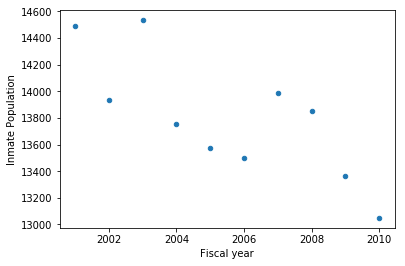

In [17]:
adip_2c.plot(x="Fiscal year", y="Inmate Population", kind='scatter');

Average daily inmate population by fiscal year 

Note: The data for each of these indicators is based upon year of report, not year of occurrence.

In [18]:
#here is solution 2 using API
url = "https://data.cityofnewyork.us/resource/j28i-aahv.json"

In [19]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [23]:
# print it out
df.head(3)

,fiscal_year,inmate_population
0,2010,13049
1,2009,13362
2,2008,13850


In [25]:
#now select a date and 2 variables
adip_3c = df[['fiscal_year', 'inmate_population']]

In [26]:
adip_3c.rename(columns = {'fiscal_year':'Fiscal year', 
               'inmate_population':'Inmate Population', 
               }, inplace=True)

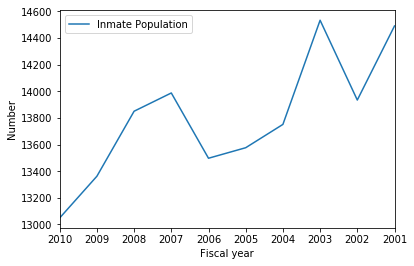

In [27]:
#as a default this plot wont have a y label, but all plots must have axis labels!
ax = adip_3c.plot(x='Fiscal year', y='Inmate Population');
ax.set_ylabel("Number");

In [ ]:
#again, the data I'm using has only two columns, so I'm not plotting a second map as in instruction.
#thank you for reading my homework